<h2>Boston Housing Price Analysis</h2>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

from seaborn import displot, pairplot, jointplot, histplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import skew

df = pd.read_csv('boston.csv')
df = df.drop(columns='Unnamed: 0')

<h2>DataFrame Shape and Summary</h2>

In [2]:
print(f'Rows: {df.shape[0]}')
print(f'COlumns: {df.shape[1]}')

Rows: 506
COlumns: 14


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>Checking for Blank Values</h2>

In [4]:
df.isna().values.any()

False

<h2>Checking for Duplicates</h2>

In [5]:
df.duplicated().values.any()

False

<h2>Number of Students per Teacher on Average</h2>

In [6]:
round(df['PTRATIO'].mean(), 2)

18.46

<h2>Average Price of Home</h2>

In [7]:
price_average = df['PRICE'].mean() * 1000
price_average = '${:,.2f}'.format(price_average)
print(price_average)

$22,532.81


<h2>Minimum and Maximum Room Averages in the Dataset</h2>

In [8]:
print(f'Maximum: {df.RM.max()}')
print(f'Minimum: {"{:,.2f}".format(df.RM.min())}')

Maximum: 8.78
Minimum: 3.56


<h2>Price Bar Chart</h2>

(5.0, 50.0)

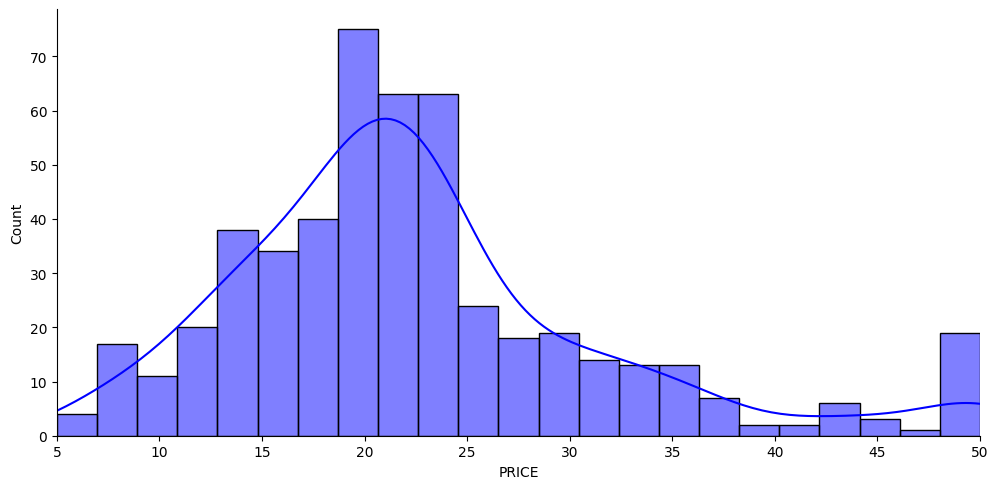

In [9]:
displot(data=df, x=df.PRICE, kde=True, aspect=2, color='blue')
plt.xlim(df.PRICE.min(), df.PRICE.max())

<h2>Bar Chart For Average Number of Rooms</h2>

(3.561, 8.78)

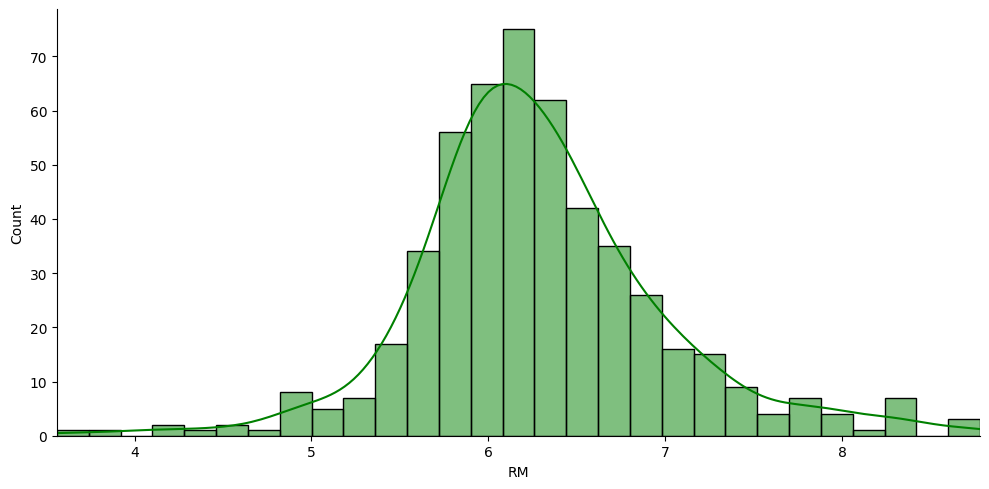

In [10]:
displot(data=df, x=df.RM, kde=True, aspect=2, color='green')
plt.xlim(df.RM.min(), df.RM.max())

<h2>Bar Chart for Weighted Distance to the 5 Boston employment centers.</h2>

(1.1296, 12.1265)

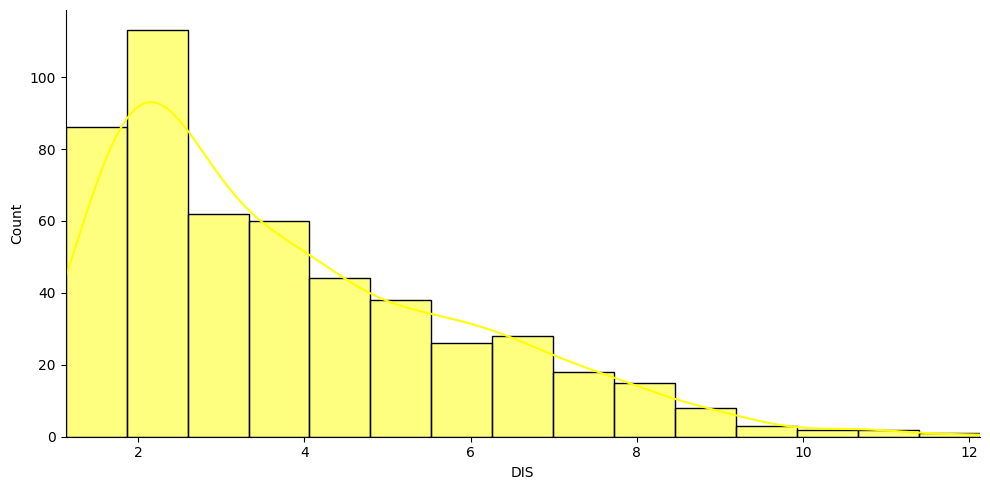

In [11]:
displot(data=df, x=df.DIS, kde=True, aspect=2, color='yellow')
plt.xlim(df.DIS.min(), df.DIS.max())

<h2>Bar Chart for Index of Accessibility to Highways</h2>

(1.0, 24.0)

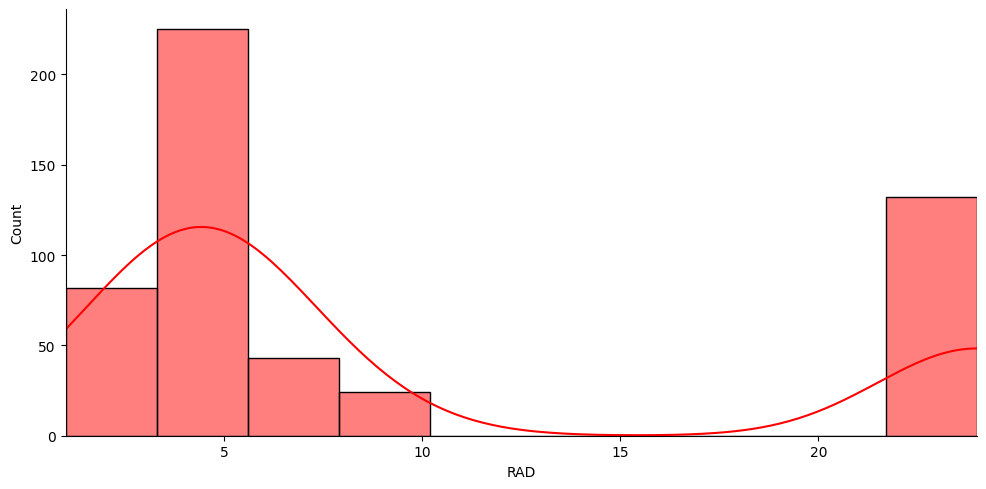

In [12]:
displot(data=df, x=df.RAD, kde=True, aspect=2, color='red')
plt.xlim(df.RAD.min(), df.RAD.max())

<h2>Homes Next to Charles River?</h2>

In [13]:
ch_data = df.CHAS.value_counts()
yes_no = ['No', 'Yes']
bar = px.bar(ch_data, x=yes_no, y='count', color=yes_no)

bar.update_layout(yaxis_range=[df.index.min(), df.index.max()],
                  xaxis_title='Property Located Neart the River?', yaxis_title='Number of Homes')

bar.show()

<h2>Pairplot showing relationships between Pollution, Distance, Number of Rooms, Prices, and Poverty</h2>

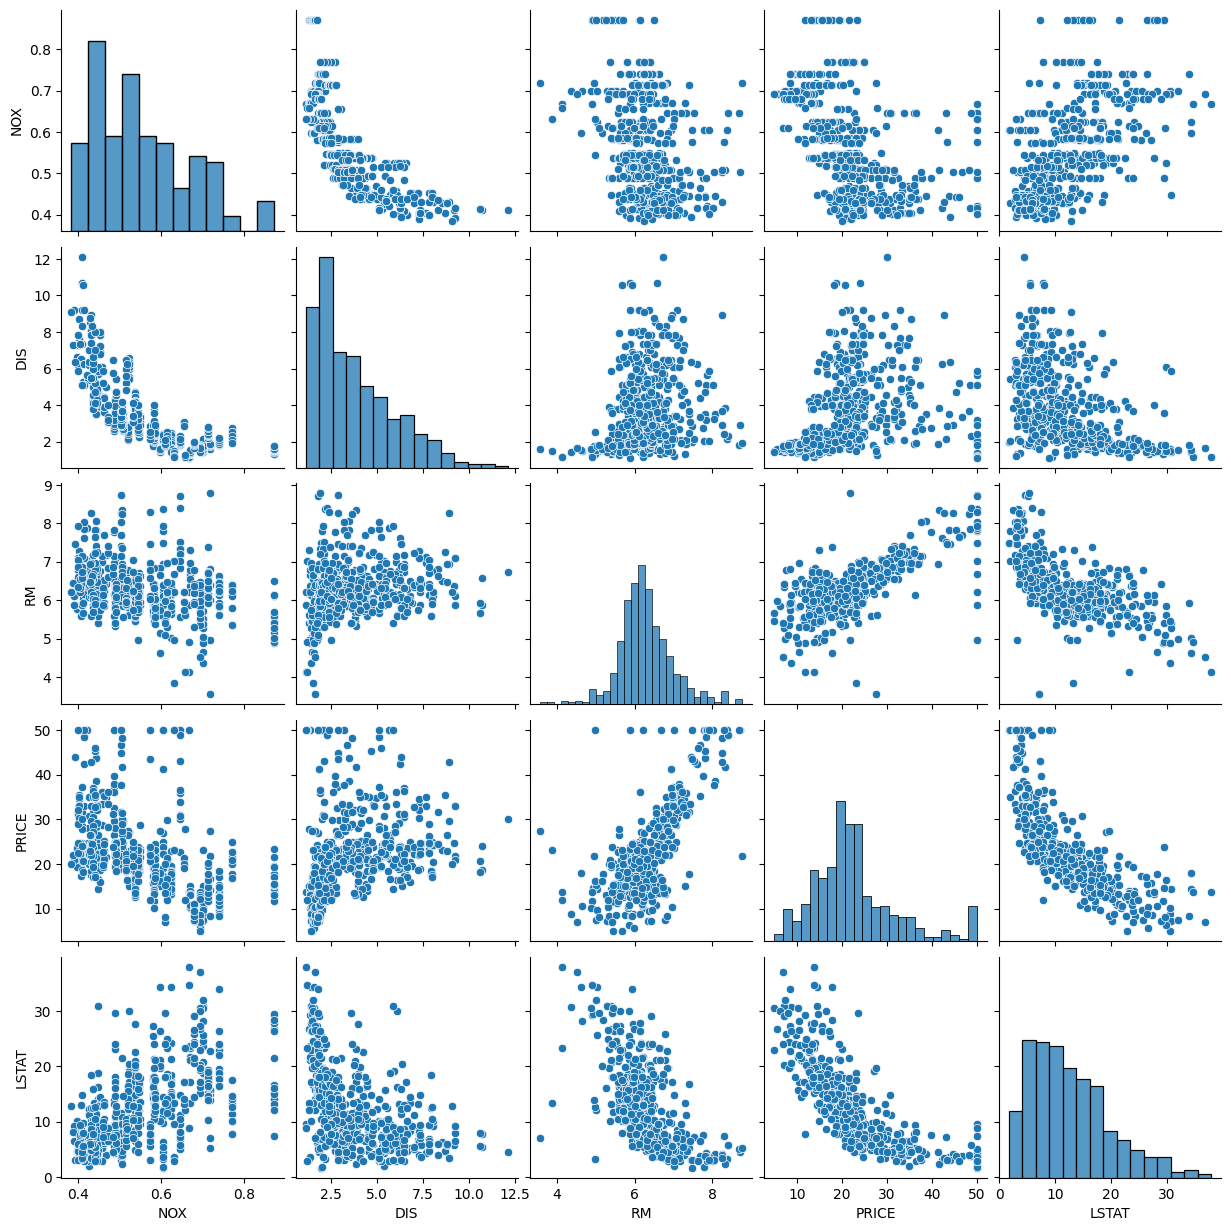

In [14]:
pair_columns = ['NOX', 'DIS', 'RM', 'PRICE', 'LSTAT']
pairplot(data=df, vars=pair_columns)

<h2>Joint Plot for Pollution and Distance</h2>

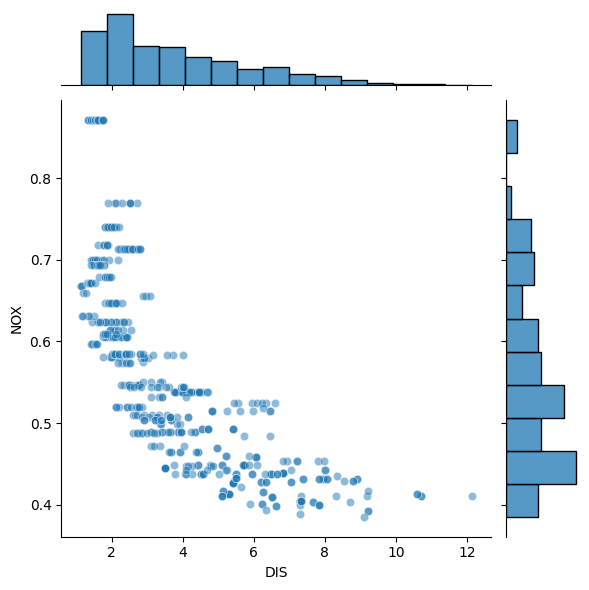

In [15]:
jointplot(data=df, x='DIS', y='NOX', joint_kws={'alpha': 0.5})

<h2>Joint Plot for Proportion of Non-Retail Industry and Pollution</h2>

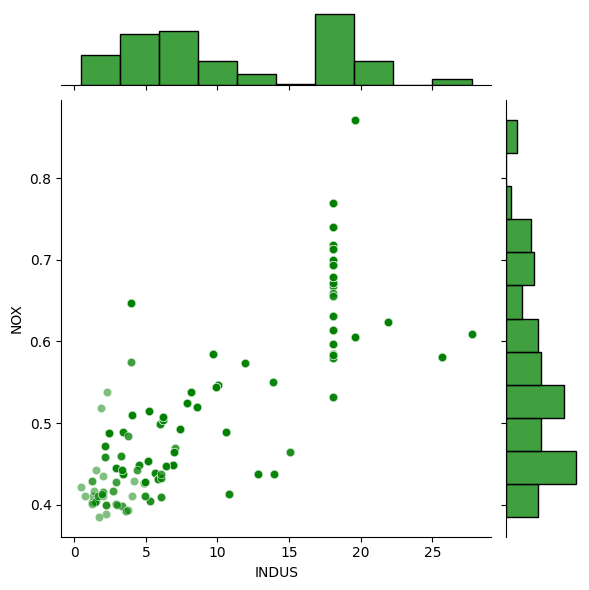

In [16]:
jointplot(data=df, x='INDUS', y='NOX', joint_kws={'alpha': 0.5}, color='green')

<h2>Joint Plot for Poverty and Number of Average Room Number per Property</h2>

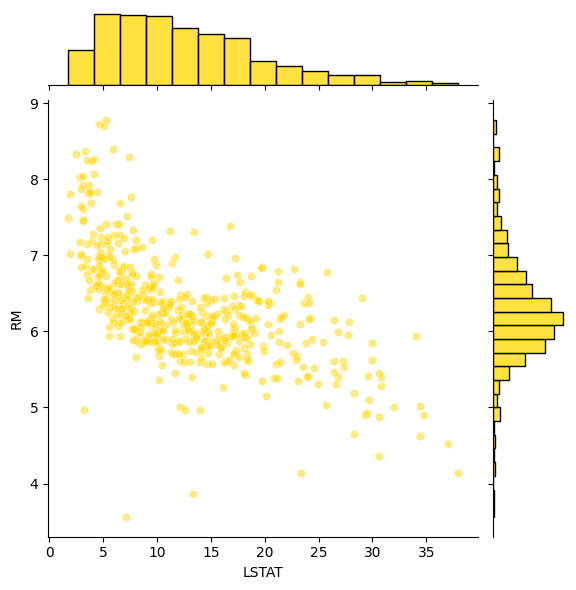

In [17]:
jointplot(data=df, x='LSTAT', y='RM', joint_kws={'alpha': 0.5}, color='gold')

<h2>Joint Plot for Poverty and Rent Price</h2>

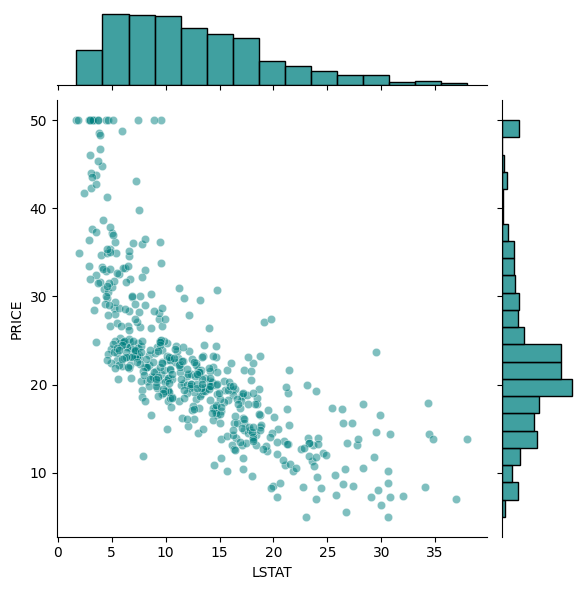

In [18]:
jointplot(data=df, x='LSTAT', y='PRICE', joint_kws={'alpha': 0.5}, color='teal')

<h2>Joint Plot for Average Number of Rooms and Rent Prices</h2>

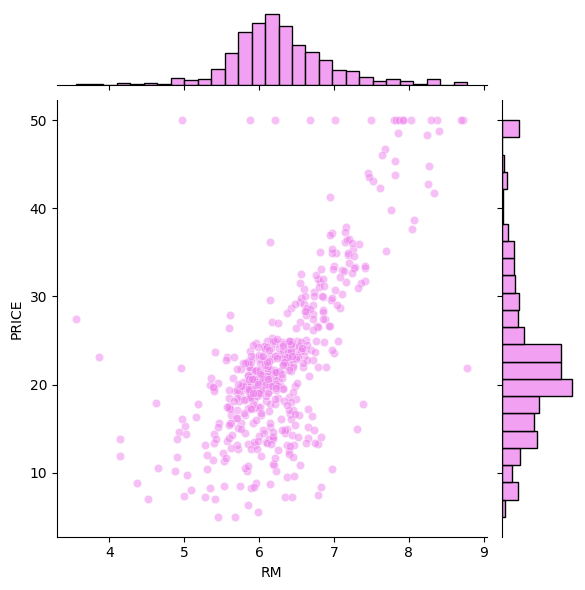

In [19]:
jointplot(data=df, x='RM', y='PRICE', joint_kws={'alpha': 0.5}, color='violet')

<h2>Factoring and Splitting Dataset</h2>

In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

<h2>Building Linear Regression Model</h2>

In [21]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

<h2>R Squared Value of Linear Regression Model</h2>
<p>According to the scikit-learn documentation below, R squared is the coefficient of determination for the prediction.</p>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</p>

In [22]:
r_squared = regressor.score(x_train, y_train)
print('{:,.2f}'.format(r_squared))

0.73


<h2>Table of Regressor's Features with their Coefficients</h2>
<p>A positive coefficient indicates that the dependent variable increases as the coefficient's feature increases whereas a negative coefficient decreases the dependent variable as the negative coefficient's feature increases.</p>

In [23]:
features = df.iloc[:, :-1]
coef_columns = features.columns
coef_dict = {'Features': coef_columns, 'Coefficients': regressor.coef_}
coefficients = pd.DataFrame(data=coef_dict)
coefficients

,Features,Coefficients
0,CRIM,-0.112387
1,ZN,0.058059
2,INDUS,0.018359
3,CHAS,2.129978
4,NOX,-19.581101
5,RM,3.095462
6,AGE,0.004453
7,DIS,-1.500476
8,RAD,0.305359
9,TAX,-0.011123


<h2>Plotting Boston Housing Prices vs Predicted Prices</h2>
<p>Actual housing prices from the 1970's in Boston are tested against the predictions of the linear regression model. The blue line indicates the actual prices whereas the dots depict the predicted prices.</p>

(5.0, 52.25)

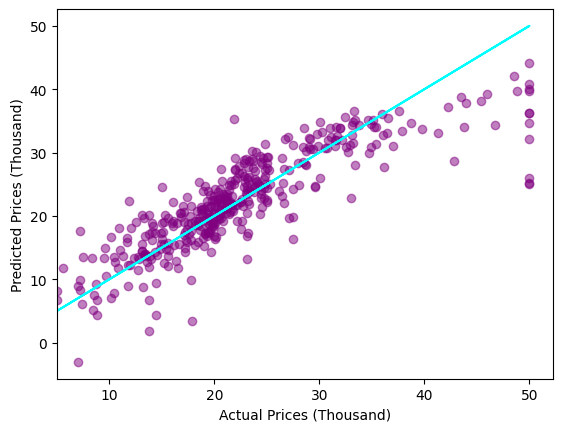

In [24]:
predictions = regressor.predict(x_train)
plt.plot(y_train, y_train, color='cyan')
plt.scatter(y_train, predictions, color='purple', alpha=0.5)
plt.xlabel('Actual Prices (Thousand)')
plt.ylabel('Predicted Prices (Thousand)')
plt.xlim(y_train.min())

<h2>Scatter Plot of Residuals vs Predicted Prices</h2>

Text(0, 0.5, 'Residuals')

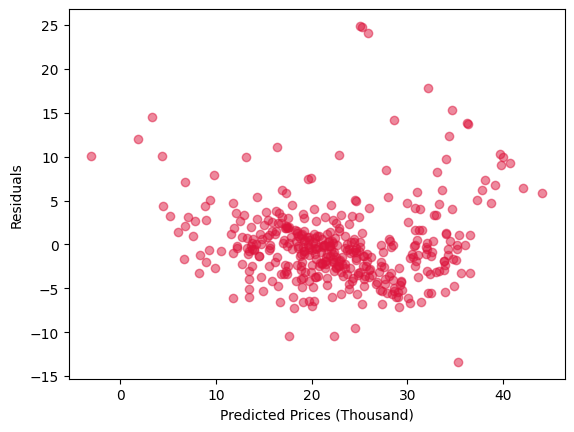

In [25]:
residuals = (y_train - predictions)
plt.scatter(predictions, residuals, color='crimson', alpha=0.5)
plt.xlabel('Predicted Prices (Thousand)')
plt.ylabel('Residuals')

<h2>Calculating Mean and Skew of Residuals</h2>
<p>The closer the values are to 0,

In [26]:
res_mean = residuals.mean()
res_skew = '{:,.2f}'.format(skew(residuals))
print(f'Residual Mean: {res_mean}')
print(f'Residual Skew: {res_skew}')

Residual Mean: 2.0507248264759326e-14
Residual Skew: 1.69


<h2>Residual Histogram</h2>

(-10.0, 10.0)

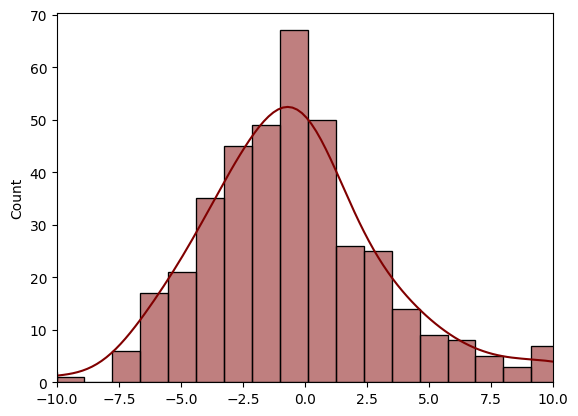

In [27]:
histplot(x=residuals, kde=True, color='maroon')
plt.xlim(-10, 10)

<h2>Histogram of Logged Prices</h2>

Skew of Logged Prices: -0.33


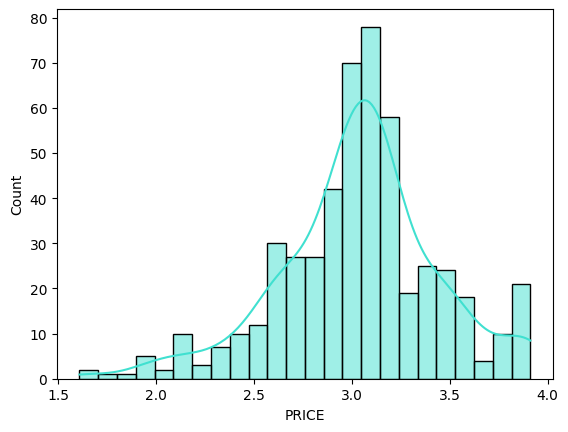

In [28]:
logged_prices = np.log(df.PRICE)
histplot(x=logged_prices, kde=True, color='turquoise')
lp_skew = '{:,.2f}'.format(skew(logged_prices))
print(f'Skew of Logged Prices: {lp_skew}')


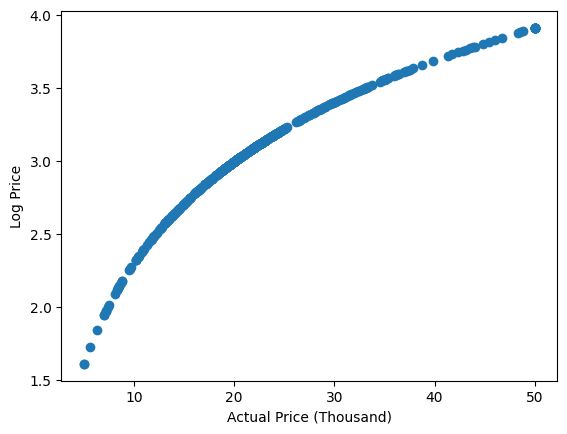

In [29]:
plt.scatter(df.PRICE.values, logged_prices)
plt.ylabel('Log Price')
plt.xlabel('Actual Price (Thousand)')
plt.show()

<h2>Creating Linear Regression Model with Logged Prices</h2>

In [30]:
new_df = df
new_df.PRICE = logged_prices
new_x = new_df.iloc[:, :-1].values
new_y = new_df.iloc[:, -1].values

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.25, random_state=1)
log_regressor = LinearRegression()
log_regressor.fit(new_x_train, new_y_train)

LinearRegression()

<h2>R Squared of Logged Price Regression Model</h2>

In [31]:
log_r_score = '{:,.2f}'.format(log_regressor.score(new_x_train, new_y_train))
print(log_r_score)

0.78


<h2>Logged Feature Coefficients</h2>
<p>A positive coefficient indicates that the dependent variable increases as the coefficient's feature increases whereas a negative coefficient decreases the dependent variable as the negative coefficient's feature increases.</p>

In [32]:
columns = df.columns[:-1]
new_dict = {'Features': columns,'Logged Coefficients': log_regressor.coef_}
logged_coefficients = pd.DataFrame(data=new_dict)
logged_coefficients

,Features,Logged Coefficients
0,CRIM,-0.010652
1,ZN,0.001450
2,INDUS,0.002971
3,CHAS,0.098726
4,NOX,-0.962316
5,RM,0.064657
6,AGE,0.000404
7,DIS,-0.049720
8,RAD,0.014353
9,TAX,-0.000521


<h2>Plot of Actual Logged Prices vs Predicted Logged Prices</h2>
<p>The straight line depicts the actual logged prices and the scatter plot depicts the predicted logged prices.</p>

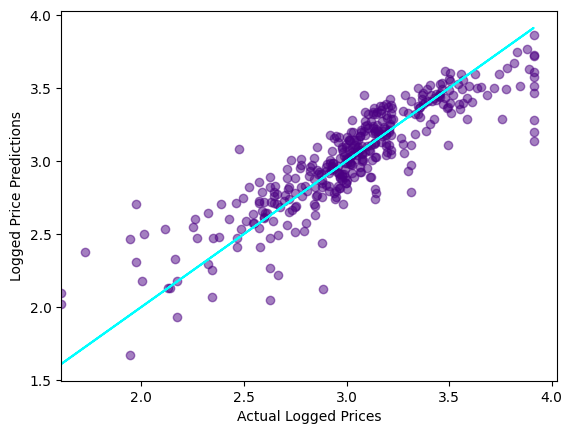

In [33]:
log_predictions = log_regressor.predict(new_x_train)
plt.plot(new_y_train, new_y_train, color='cyan')
plt.scatter(new_y_train, log_predictions, color='indigo', alpha=0.5)
plt.ylabel('Logged Price Predictions')
plt.xlabel('Actual Logged Prices')
plt.xlim(new_y_train.min())
plt.show()

<h2>Scatter Plot of Logged Residuals vs Logged Price Predictions</h2>

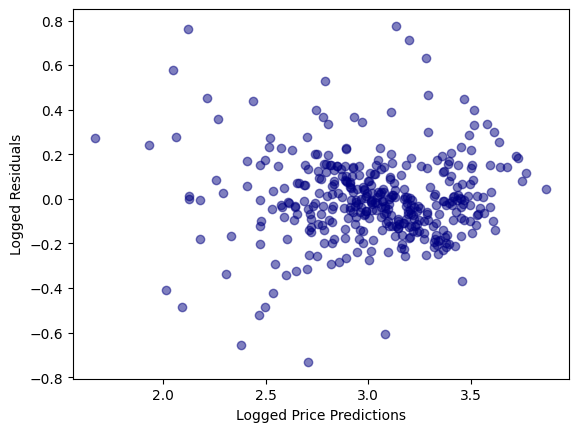

In [34]:
new_residuals = (new_y_train - log_predictions)
plt.scatter(log_predictions, new_residuals, color='navy', alpha=0.5)
plt.ylabel('Logged Residuals')
plt.xlabel('Logged Price Predictions')
plt.show()

<h2>Skew and Mean of Logged Residuals</h2>

In [35]:
log_res_mean = new_residuals.mean()
log_res_skew = '{:,.2f}'.format(skew(new_residuals))

print(f'Logged Residual Mean: {log_res_mean}')
print(f'Logged Residual Skew: {log_res_skew}')

Logged Residual Mean: 8.805621139902957e-16
Logged Residual Skew: 0.41


<h2>R Squared Comparison of Both Regression Models</h2>

In [36]:
r_squared = '{:,.2f}'.format(r_squared)
new_r_squared = log_regressor.score(new_x_train, new_y_train)
new_r_squared = '{:,.2f}'.format(new_r_squared)
print(f'R Squared of Unlogged Prices: {r_squared}')
print(f'R Squared of Logged Prices: {new_r_squared}')

R Squared of Unlogged Prices: 0.73
R Squared of Logged Prices: 0.78


<h2>Average of All Features in the Dataset</h2>

In [87]:
features = df.drop(['PRICE'], axis=1)
avg_features = features.mean().values
avg_features = pd.DataFrame(data=avg_features.reshape(1, len(features.columns)), columns=features.columns)
avg_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


<h2>What the Pricing of Property with Averaged Features Would Look Like</h2>

In [88]:
new_log_predictions = log_regressor.predict(avg_features.values)[0]
new_log_predictions = np.exp(new_log_predictions)
new_log_predictions = '${:,.2f}'.format(new_log_predictions * 1000)
print(new_log_predictions)

$20,896.52


<h2>Testing the Pricing of a New Property</h2>
<p>This new unit:</p>
<ul>
<li>is next to the Charles River</li>
<li>has 8 rooms</li>
<li>is in an area of a ratio of 20 students</li>
<li>has a distance of 5 miles to the nearest employment center</li>
<li>has pollution in the upper quartile</li>
<li>has poverty in the lower quartile</li>
</ul>



In [89]:
test_features = avg_features
test_features.CHAS = 1
test_features.RM = 8
test_features.PTRATIO = 20
test_features.DIS = 5
test_features.NOX = df.NOX.quantile(q=0.75)
test_features.LSTAT = df.LSTAT.quantile(q=0.25)

test_prediction = log_regressor.predict(test_features.values)[0]
test_prediction = np.exp(test_prediction)
test_prediction = '${:,.2f}'.format(test_prediction * 1000)
print(test_prediction)

$24,960.32
